<a href="https://colab.research.google.com/github/cmu-l3/anlp-fall2025-code/blob/main/16_rl_llm/rl_reverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reinforcement learning for language models

Lecture 16 | CMU ANLP Fall 2025 | Instructor: Sean Welleck

This notebook shows fine-tuning a language model with reinforcement for a language generation task. The task is reversing an input string.

The model is first fine-tuned with supervised fine-tuning, then fine-tuned with a PPO-style algorithm (specifically, the clipped PPO loss with an advantage computation based on averaging the rewards of multiple outputs).

The reward is 1 when the generated string is the reverse of the input string, and 0 otherwise.

The implementation of each part is found in its respective script (`sft.py`, `reverse_ppo.py`, `evaluate.py`). For more background on the task formulation and SFT, you can see the [fine-tuning lecture notebook](https://github.com/cmu-l3/anlp-fall2025-code/blob/main/08_finetuning/finetuning_lm.ipynb).

*Tip: if you'd like to modify the code, you can copy and paste a script into the notebook and modify the code*

### Supervised fine-tuning

In [ ]:
!python sft.py

tokenizer_config.json: 3.66kB [00:00, 19.5MB/s]
vocab.json: 801kB [00:00, 61.6MB/s]
merges.txt: 466kB [00:00, 114MB/s]
tokenizer.json: 2.10MB [00:00, 171MB/s]
special_tokens_map.json: 100% 831/831 [00:00<00:00, 9.27MB/s]
config.json: 100% 704/704 [00:00<00:00, 7.46MB/s]
2025-10-20 19:18:46.795520: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-20 19:18:46.813064: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760987926.833989    6244 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760987926.840466    6244 cuda_blas.cc

### Evaluate the SFT model

In [ ]:
!python evaluate.py --checkpoint_path model_sft.pt

Using device: cuda

Loading model and tokenizer...
2025-10-20 19:44:17.604962: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-20 19:44:17.622698: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760989457.643754   12989 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760989457.650303   12989 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760989457.666865   12989 computation_placer.cc:177] computation placer already 

### Wandb login

You should create a [wandb account](https://wandb.ai/home). If you don't want to do that, you can comment out the wandb lines in the `reverse_ppo.py` script.

In [ ]:
import wandb
wandb.login()

### Run the RL

If you have Colab Pro, you can select the A100 runtime. It allows for using a larger batch size, which typically results in faster and more stable training for this application (feel free to try different batch sizes and compare yourself).

The free GPU also works.

In [ ]:

# If using A100:
!python reverse_ppo.py --batch_size 32

# Otherwise:
# !python reverse_ppo.py --batch_size 16

### Evaluate the RL model

notice the improved test accuracy!

In [ ]:
!python evaluate.py --checkpoint_path model_rl.pt

Using device: cuda

Loading model and tokenizer...
2025-10-20 21:05:26.884305: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-20 21:05:26.902392: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760994326.923702   33630 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760994326.930187   33630 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760994326.946844   33630 computation_placer.cc:177] computation placer already 

Here is the wandb plot that I got from running it with the command above (A100 runtime, for approximately 1 hour):

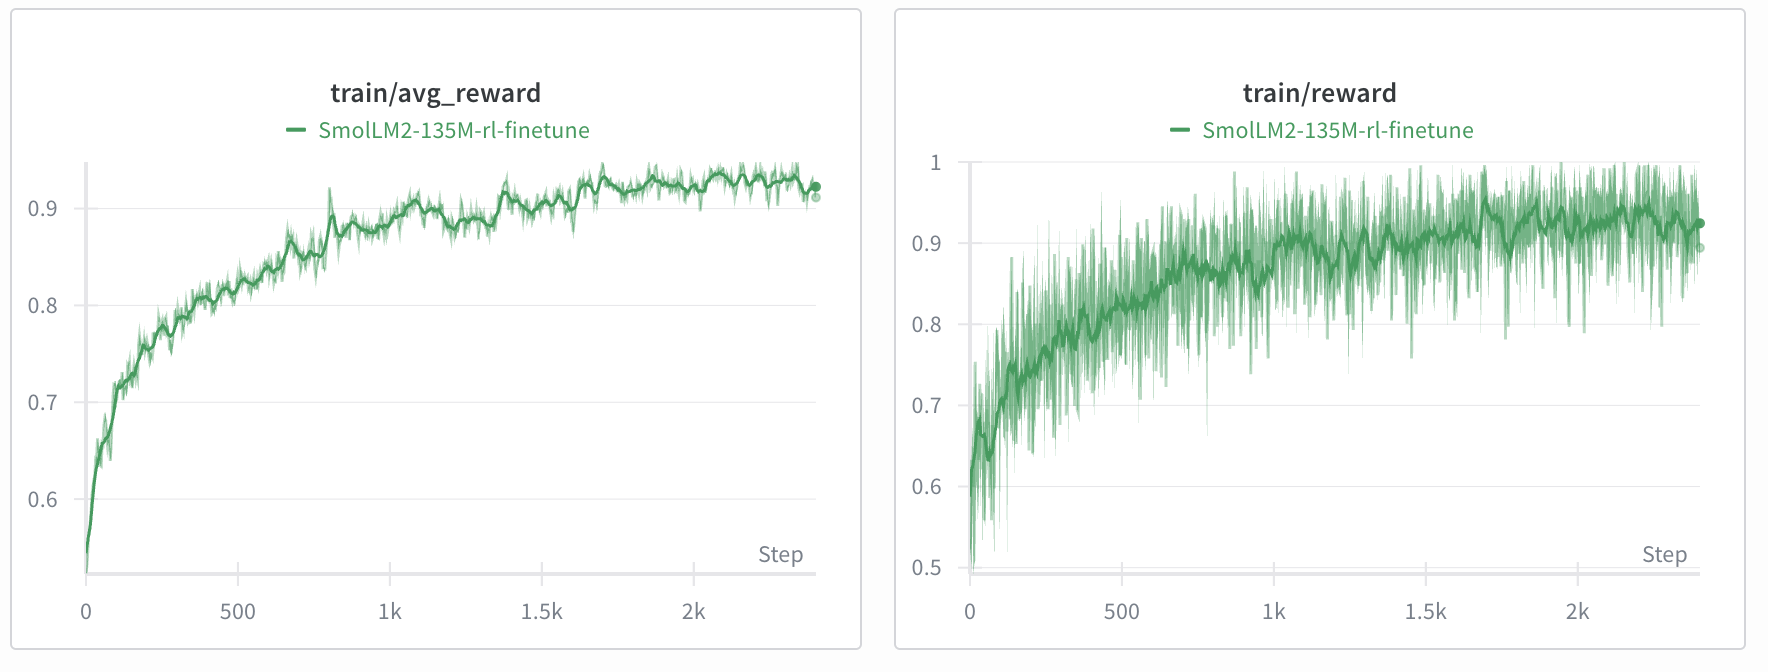